## **STORE TRANSACTION DATA ANALYSIS**

##OBJECTIVE
1.  To analyse the store data on the basis of different elements like cost,location , id etc
2.  To clean the data ,remove duplicates, eliminate irrelevant values , and reshape the data
3.  To know the most populous month of the year
4.  To know the most populous days of the month
5.  To know the most populous country
6.  To know the most populous hours of the day
7.  To know the most saleable item and item code
8.  To know the most recurring trancationID and description
9.  To know the highest qty sale item
10. To know the trend in most populous country


In [110]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization

In [111]:
#displaying all the columns
pd.set_option('display.max_columns', None)

In [112]:
#reading the datset
df = pd.read_csv(r"transaction_data.csv")
df_copy = df.copy()
df


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1048570,328440,6246691,Tue Dec 04 10:59:00 IST 2018,492345,ICE CREAM BUBBLES,60,1.15,United Kingdom
1048571,300258,6288183,Sun Dec 30 08:17:00 IST 2018,1786491,CHARLIE+LOLA MY ROOM DOOR SIGN,72,0.54,United Kingdom
1048572,337743,6213592,Mon Nov 12 06:47:00 IST 2018,481950,36 DOILIES VINTAGE CHRISTMAS,108,2.01,United Kingdom
1048573,260568,6323482,Sat Jan 19 08:27:00 IST 2019,480858,CHILDRENS APRON APPLES DESIGN,24,2.70,Belgium


In [113]:
#knowing the datatype
df.dtypes

UserId                      int64
TransactionId               int64
TransactionTime            object
ItemCode                    int64
ItemDescription            object
NumberOfItemsPurchased      int64
CostPerItem               float64
Country                    object
dtype: object

In [114]:
#converting space and none to np.nan
df.replace(to_replace=[None], value=np.nan, inplace=True)
df.replace(to_replace='isnull', value=np.nan, inplace=True)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [115]:
#knowing the dataset shape
df_shape = df.shape
df_shape

(1048575, 8)

In [116]:
#calculating the null values of columns
df_missingvalues_columns = df.isna().sum(axis = 0).sort_values(ascending = False)
df_missingvalues_columns

ItemDescription           2793
UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [117]:
#removing duplicates
df=df.drop_duplicates()
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [118]:
#explore columns of the data for forther use
df.columns

Index(['UserId', 'TransactionId', 'TransactionTime', 'ItemCode',
       'ItemDescription', 'NumberOfItemsPurchased', 'CostPerItem', 'Country'],
      dtype='object')

In [119]:
#checking the shape after removing duplicate values
df.shape

(536047, 8)

In [120]:
#renaming the columns
df=df.rename(columns={"NumberOfItemsPurchased":"Qty"})
#customers ordered negative quantity,which is not possible.so we filter quantity grater then zero
df=df[(df["Qty"]>0)]
df.shape

(525469, 8)

In [121]:
#finding the null values
df.isnull().sum()

UserId               0
TransactionId        0
TransactionTime      0
ItemCode             0
ItemDescription    590
Qty                  0
CostPerItem          0
Country              0
dtype: int64

In [122]:
df_preprocess = len(df)/len(df_copy)
df_preprocess

0.501126767279403

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525469 entries, 0 to 1048503
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UserId           525469 non-null  int64  
 1   TransactionId    525469 non-null  int64  
 2   TransactionTime  525469 non-null  object 
 3   ItemCode         525469 non-null  int64  
 4   ItemDescription  524879 non-null  object 
 5   Qty              525469 non-null  int64  
 6   CostPerItem      525469 non-null  float64
 7   Country          525469 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 36.1+ MB


In [124]:
#droping the missing values
df=df.dropna()
df.count()

UserId             524879
TransactionId      524879
TransactionTime    524879
ItemCode           524879
ItemDescription    524879
Qty                524879
CostPerItem        524879
Country            524879
dtype: int64

In [125]:
#Most transaction made
df['TransactionId'].value_counts()

6309435    1113
6393409     747
6396412     730
6388019     719
6143225     703
           ... 
5944488       1
6301152       1
6148175       1
5935237       1
6259946       1
Name: TransactionId, Length: 20136, dtype: int64

In [126]:
#most item sold
df['ItemCode'].value_counts()

 1787079    3879
 1787583    2323
-1          2203
 998886     2163
 470883     2009
            ... 
 1787499       1
 783930        1
 443520        1
 495642        1
 784959        1
Name: ItemCode, Length: 3297, dtype: int64

In [127]:
#adding a new column total Cost
df['Total_Cost']=df['Qty']*df['CostPerItem']
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,Qty,CostPerItem,Country,Total_Cost
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,10.20


In [128]:
#finding most expensive items
most_exp_items=df.sort_values("CostPerItem",ascending=False)
most_exp_items.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,Qty,CostPerItem,Country,Total_Cost
320282,288687,5900323,Mon Feb 12 06:37:00 IST 2018,465780,RETROSPOT LAMP,24,1696285.44,United Kingdom,40710850.56
940702,-1,5913952,Fri Feb 18 11:08:00 IST 2028,-1,AMAZON FEE,3,18687.04,United Kingdom,56061.12
583721,-1,6195035,Wed Oct 24 10:50:00 IST 2018,-1,Adjust bad debt,3,15265.65,United Kingdom,45796.95
111440,336609,6068667,Sun Jul 15 09:46:00 IST 2018,-1,POSTAGE,3,11237.00,United Kingdom,33711.00
241312,-1,6192505,Tue Oct 23 06:14:00 IST 2018,-1,DOTCOM POSTAGE,3,6217.14,United Kingdom,18651.42


In [129]:
#finding most qty sold
most_qty_items=df.sort_values("Qty",ascending=False)
most_qty_items.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,Qty,CostPerItem,Country,Total_Cost
510647,345366,6396313,Wed Feb 20 05:15:00 IST 2019,500703,"PAPER CRAFT , LITTLE BIRDIE",242985,2.88,United Kingdom,699796.8
528376,259266,5955741,Sun Apr 01 06:01:00 IST 2018,486486,MEDIUM CERAMIC TOP STORAGE JAR,222645,1.44,United Kingdom,320608.8
158382,278376,6367251,Wed Feb 06 11:57:00 IST 2019,1781346,ASSTD DESIGN 3D PAPER STICKERS,37620,0.00,United Kingdom,0.0
447048,270921,6303088,Tue Jan 08 08:26:00 IST 2019,1765617,WORLD WAR 2 GLIDERS ASSTD DESIGNS,14400,0.29,United Kingdom,4176.0
392207,275835,6103548,Wed Aug 08 06:52:00 IST 2018,466137,SMALL POPCORN HOLDER,12900,1.00,United Kingdom,12900.0


In [130]:
type(df['TransactionTime'][0])

str

In [131]:
# slicing the time from string values of Transaction time columns
df['TransactionTime'][0][11:19]

'12:50:00'

In [132]:
#slicing the date from string values of Transaction time columns
df['TransactionTime'][0][4:10]

'Feb 02'

In [133]:
#making  a column named Time by slicing the time out of column
df['Time'] = df['TransactionTime'].apply(lambda x: x[11:19])

In [134]:
#making  a column named Date by slicing the Date out of transactionalTime column
df['Date'] = df['TransactionTime'].apply(lambda x: x[4:10])

In [135]:
#making  a column named Day by slicing the Day out of transactionalTime column
df['Day'] = df['TransactionTime'].apply(lambda x: x[0:3])

In [136]:
#making  a column named month by slicing the month out of transactionalTime column
df['Month'] = df['TransactionTime'].apply(lambda x: x[4:7])
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,Qty,CostPerItem,Country,Total_Cost,Time,Date,Day,Month
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38,12:50:00,Feb 02,Sat,Feb
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56,09:06:00,Dec 26,Wed,Dec
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80,09:45:00,Feb 15,Fri,Feb
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19,07:14:00,Jun 22,Fri,Jun
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,10.20,11:58:00,Sep 10,Mon,Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048419,336294,5990567,Sat May 05 13:42:00 IST 2018,1784811,60 TEATIME FAIRY CAKE CASES,6,0.76,United Kingdom,4.56,13:42:00,May 05,Sat,May
1048434,355047,6332898,Tue Jan 22 14:04:00 IST 2019,444549,YOU'RE CONFUSING ME METAL SIGN,9,2.34,United Kingdom,21.06,14:04:00,Jan 22,Tue,Jan
1048448,-1,6099786,Sun Aug 05 13:24:00 IST 2018,484638,ICE CREAM PEN LIP GLOSS,18,1.73,United Kingdom,31.14,13:24:00,Aug 05,Sun,Aug
1048496,264117,6319511,Wed Jan 16 09:15:00 IST 2019,340725,RATTLE SNAKE EGGS,12,1.73,France,20.76,09:15:00,Jan 16,Wed,Jan


In [137]:
#date
import time
#time.strptime(df['TransactionTime'][0])
def timet(x):
  t = time.strptime(x.replace('IST',''))
  return(str(t[0]) +"-" + str(t[1]) + "-" +str(t[2]))

In [138]:
df['Datee'] = df['TransactionTime'].apply(lambda x:timet(x))
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,Qty,CostPerItem,Country,Total_Cost,Time,Date,Day,Month,Datee
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38,12:50:00,Feb 02,Sat,Feb,2019-2-2
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56,09:06:00,Dec 26,Wed,Dec,2018-12-26
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80,09:45:00,Feb 15,Fri,Feb,2019-2-15
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19,07:14:00,Jun 22,Fri,Jun,2018-6-22
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,10.20,11:58:00,Sep 10,Mon,Sep,2018-9-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048419,336294,5990567,Sat May 05 13:42:00 IST 2018,1784811,60 TEATIME FAIRY CAKE CASES,6,0.76,United Kingdom,4.56,13:42:00,May 05,Sat,May,2018-5-5
1048434,355047,6332898,Tue Jan 22 14:04:00 IST 2019,444549,YOU'RE CONFUSING ME METAL SIGN,9,2.34,United Kingdom,21.06,14:04:00,Jan 22,Tue,Jan,2019-1-22
1048448,-1,6099786,Sun Aug 05 13:24:00 IST 2018,484638,ICE CREAM PEN LIP GLOSS,18,1.73,United Kingdom,31.14,13:24:00,Aug 05,Sun,Aug,2018-8-5
1048496,264117,6319511,Wed Jan 16 09:15:00 IST 2019,340725,RATTLE SNAKE EGGS,12,1.73,France,20.76,09:15:00,Jan 16,Wed,Jan,2019-1-16


In [139]:
T1 = {"1 to 6":0}
T2 = { "6 to 12":0}
T3 = { "13 to 18":0}
T4 = { "19 to 24":0}
Q1 = []
Q2 = []
Q3 = []
Q4 = []
for i in df['Time']:
  if i>="01:00:00"and i<="06:00:00":
    Q1.append(i)
  elif i>"06:00:00"and i<="12:00:00":
    Q2.append(i)
  elif i>"13:00:00"and i<="18:00:00":
    Q3.append(i)
  else:
    Q4.append(i)

T1["1 to 6"] =  len(Q1)
T2["6 to 12"] =  len(Q2)
T3["13 to 18"] =  len(Q3)
T4["19 to 24"] =  len(Q4)
print(T1)
print(T2)
print(T3)
print(T4)

{'1 to 6': 43387}
{'6 to 12': 389877}
{'13 to 18': 37949}
{'19 to 24': 53666}


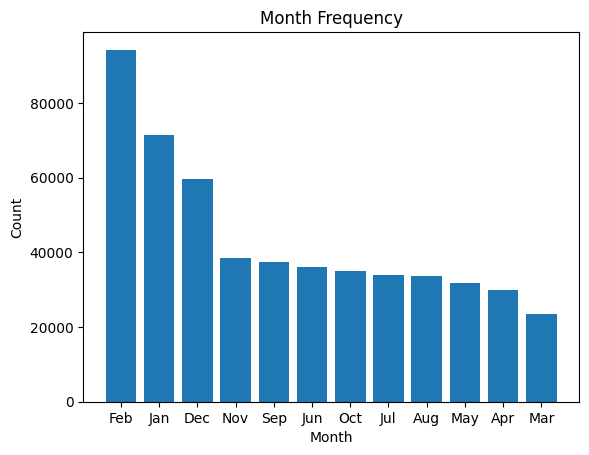

In [140]:
#to know month with most no. of transaction
counts_month= df['Month'].value_counts()

# Create the bar plot
month_bar = plt.bar(counts_month.index, counts_month.values)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month Frequency')

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,int(height), ha='center', va='bottom')


autolabel(month_bar)
plt.show()

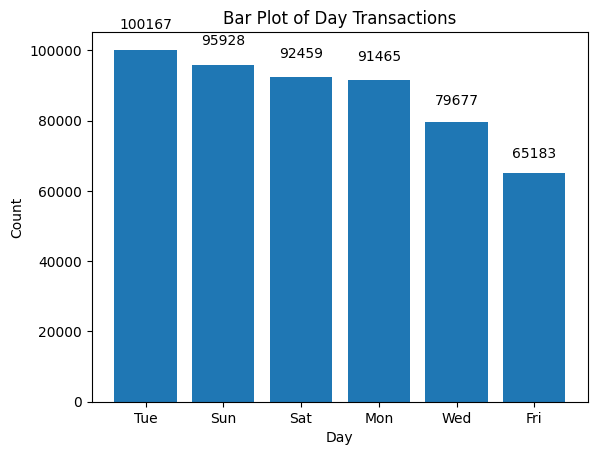

In [141]:
#to know the day with most no. of sales
counts = df['Day'].value_counts()

# Create the bar plot
fig, ax = plt.subplots()
day_bar = plt.bar(counts.index, counts.values)

# Set the labels and title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Bar Plot of Day Transactions')
def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,int(height), ha='center', va='bottom')


autolabel(day_bar)
plt.show()

In [142]:
df['Country'].value_counts()

United Kingdom          480007
Germany                   9017
France                    8388
EIRE                      7874
Spain                     2479
Netherlands               2361
Belgium                   2030
Switzerland               1957
Portugal                  1492
Australia                 1183
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     602
Sweden                     449
Unspecified                441
Austria                    397
Denmark                    378
Poland                     330
Japan                      321
Israel                     291
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

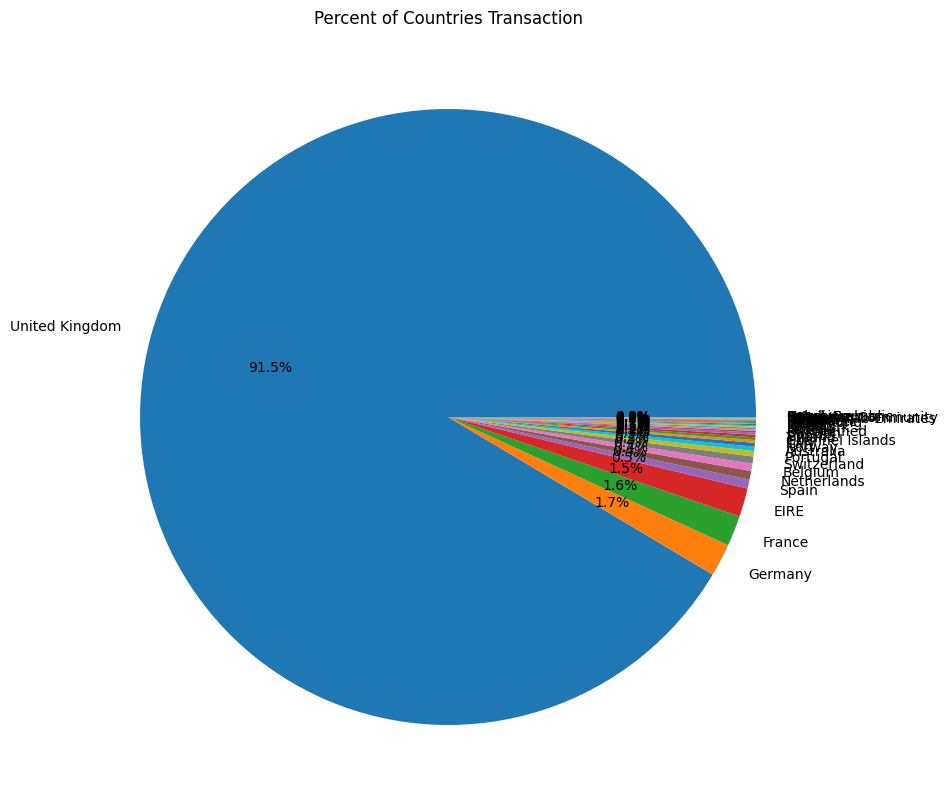

In [143]:
plt.figure(figsize=(10,10))
plt.pie(df['Country'].value_counts(), labels=df['Country'].value_counts().index, autopct='%1.1f%%')
plt.title("Percent of Countries Transaction")

plt.show()
#as 91.5 percent share of transactuons are from UK, will be analysisng the further dataset on the basis of UK only

In [144]:
uk_data=df[df.Country== "United Kingdom"]

In [145]:
uk_data.describe()

,UserId,TransactionId,ItemCode,Qty,CostPerItem,Total_Cost
count,480007.000000,4.800070e+05,4.800070e+05,480007.000000,4.800070e+05,4.800070e+05
mean,237301.391171,6.159255e+06,6.660026e+05,29.232705,8.803410e+00,1.622783e+02
std,148274.812390,1.485005e+05,4.575240e+05,491.835849,2.449023e+03,5.877230e+04
min,-1.000000,5.900015e+06,-1.000000e+00,3.000000,-1.526564e+04,-4.579692e+04
25%,-1.000000,6.026460e+06,4.614120e+05,3.000000,1.730000e+00,1.416000e+01
50%,305067.000000,6.165929e+06,4.754190e+05,9.000000,2.900000e+00,3.519000e+01
75%,345240.000000,6.292253e+06,4.891950e+05,30.000000,5.700000e+00,7.038000e+01
max,384027.000000,6.397446e+06,1.894494e+06,242985.000000,1.696285e+06,4.071085e+07


In [146]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480007 entries, 0 to 1048448
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UserId           480007 non-null  int64  
 1   TransactionId    480007 non-null  int64  
 2   TransactionTime  480007 non-null  object 
 3   ItemCode         480007 non-null  int64  
 4   ItemDescription  480007 non-null  object 
 5   Qty              480007 non-null  int64  
 6   CostPerItem      480007 non-null  float64
 7   Country          480007 non-null  object 
 8   Total_Cost       480007 non-null  float64
 9   Time             480007 non-null  object 
 10  Date             480007 non-null  object 
 11  Day              480007 non-null  object 
 12  Month            480007 non-null  object 
 13  Datee            480007 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 54.9+ MB


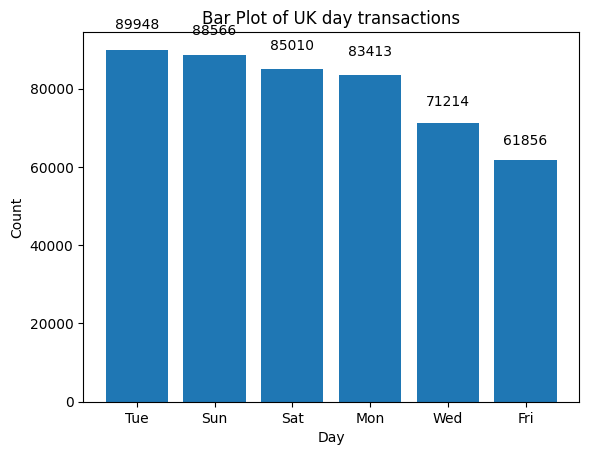

In [149]:
#to know the day with most no. of sales
counts = uk_data['Day'].value_counts()

# Create the bar plot
fig, ax = plt.subplots()
day_bar = plt.bar(counts.index, counts.values)

# Set the labels and title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Bar Plot of UK day transactions')
def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,int(height), ha='center', va='bottom')


autolabel(day_bar)
plt.show()

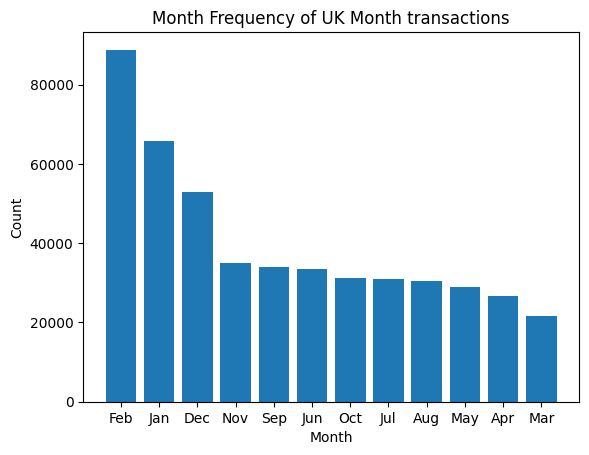

In [150]:
#to know month with most no. of transaction
counts_month= uk_data['Month'].value_counts()

# Create the bar plot
month_bar = plt.bar(counts_month.index, counts_month.values)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month Frequency of UK Month transactions')


## FINDINGS


1.   Approx 50% of data is left after cleaning
2.   Most number of transactions are done by trancationID = 6309435
3.   Most items are sold by itemCode 1787079 which relates to items with JUMBO size descrpition
4.   Most expensive total cost transaction happened in store was of RETROSPOT LAMP, i.e, RS. 40710850.56
5.   Most no. of items sold are of category PAPER CRAFT , LITTLE BIRDIE
6.   Most no. of transactions are done in late evening from 7pm - 12am followed by early morning from 12am to 6am
7.  Most number of transaction are done in Feb which are more than double volumn of March,i.e, least transactional month
8.  Most popular day for sale is tuesday
9.  Most populous country is UK with 91.5% of transactions
10. Same trend of most popular day and month are seen in UK

